## Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# EDA

In [4]:
df = pd.read_csv("train.csv")

In [5]:
df.head()

,neighbourhood_group,room_type,minimum_nights,amenity_score,number_of_reviews,availability_365,price_class
0,Manhattan,NaN,2.0,82.5,15.0,254.0,3
1,Manhattan,Private room,2.0,53.7,1.0,0.0,1
2,Brooklyn,Private room,2.0,47.8,70.0,90.0,1
3,Manhattan,Entire home/apt,2.0,58.8,1.0,NaN,1
4,Bronx,Private room,2.0,32.2,0.0,89.0,1


In [6]:
df.columns

Index(['neighbourhood_group', 'room_type', 'minimum_nights', 'amenity_score',
       'number_of_reviews', 'availability_365', 'price_class'],
      dtype='object')

In [7]:
df.isna().sum()

,0
neighbourhood_group,839
room_type,611
minimum_nights,1322
amenity_score,916
number_of_reviews,1123
availability_365,595
price_class,0


Since there are a lot missing values we cannot remove these as it will result in substantial reduction of the dataset, using imputation by
for cat vars: replacing the missing values by mode of the column
for num vars: replacing the missing values with the median (to avoid the effect of outliers we did not use mean)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41348 entries, 0 to 41347
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   neighbourhood_group  40509 non-null  object 
 1   room_type            40737 non-null  object 
 2   minimum_nights       40026 non-null  float64
 3   amenity_score        40432 non-null  float64
 4   number_of_reviews    40225 non-null  float64
 5   availability_365     40753 non-null  float64
 6   price_class          41348 non-null  int64  
dtypes: float64(4), int64(1), object(2)
memory usage: 2.2+ MB


neighbourhood group: NYC borough (categorical)

• room type: Type of accommodation (categorical)

• minimum nights: Minimum nights required for booking (numeric)

• number of reviews: Total number of reviews (numeric)

• availability 365: Number of available days in the next year (numeric)

• amenity score: Listing amenity/quality score (numeric)

• price class: Price category label in {0 = Budget, 1 = Moderate, 2 = P remium, 3 =
Luxury} listings.


In [9]:
cat_cols = df.select_dtypes(include=["object", "category"]).columns
num_cols = df.select_dtypes(include=["int64", "float64"]).columns

In [10]:
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

In [11]:
for col in num_cols:
    df[col] = df[col].fillna(df[col].median())

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41348 entries, 0 to 41347
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   neighbourhood_group  41348 non-null  object 
 1   room_type            41348 non-null  object 
 2   minimum_nights       41348 non-null  float64
 3   amenity_score        41348 non-null  float64
 4   number_of_reviews    41348 non-null  float64
 5   availability_365     41348 non-null  float64
 6   price_class          41348 non-null  int64  
dtypes: float64(4), int64(1), object(2)
memory usage: 2.2+ MB


THe Missing values have been catered

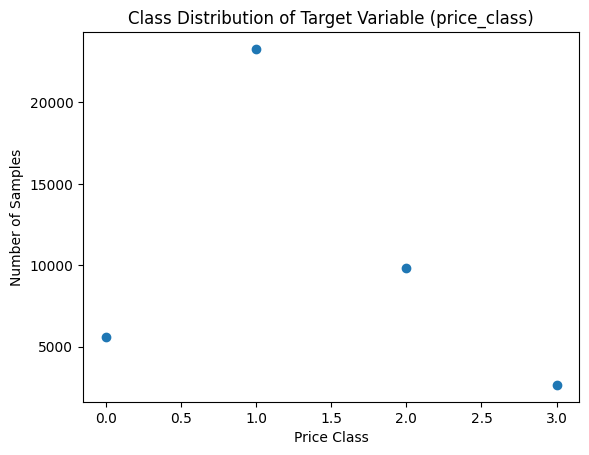

In [13]:


# Count classes
class_counts = df['price_class'].value_counts().sort_index()

# Plot
plt.figure()
plt.scatter(class_counts.index, class_counts.values)
plt.xlabel("Price Class")
plt.ylabel("Number of Samples")
plt.title("Class Distribution of Target Variable (price_class)")
plt.show()


Observation:
class 1 has more data points than other variables as we can see from the plot there high chance of our model giving more 1's than required :)

In [14]:
print(df['neighbourhood_group'].value_counts(),"\n")

print(df['room_type'].value_counts())


neighbourhood_group
Manhattan        18744
Brooklyn         16692
Queens            4696
Bronx              907
Staten Island      309
Name: count, dtype: int64 

room_type
Entire home/apt    21710
Private room       18663
Shared room          975
Name: count, dtype: int64


Encoding Choice (One HOT Encoding)
Reason: The categories have low cardinality and are nominal

In [15]:
#Separate features and target vars

X = df.drop(columns='price_class')  # features
y = df['price_class']               # target (unchanged)

X = pd.get_dummies(
    X,
    columns=['neighbourhood_group', 'room_type'],  # categorical features
    drop_first=True  # optional: avoids dummy variable trap
)

In [16]:
X.head()

,minimum_nights,amenity_score,number_of_reviews,availability_365,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Private room,room_type_Shared room
0,2.0,82.5,15.0,254.0,False,True,False,False,False,False
1,2.0,53.7,1.0,0.0,False,True,False,False,True,False
2,2.0,47.8,70.0,90.0,True,False,False,False,True,False
3,2.0,58.8,1.0,44.0,False,True,False,False,False,False
4,2.0,32.2,0.0,89.0,False,False,False,False,True,False


In [17]:
df.describe()

,minimum_nights,amenity_score,number_of_reviews,availability_365,price_class
count,41348.000000,41348.000000,41348.000000,41348.000000,41348.000000
mean,6.874891,51.974224,23.141676,110.934918,1.231619
std,19.420221,19.242915,44.014080,130.576674,0.758579
min,1.000000,10.000000,0.000000,0.000000,0.000000
25%,1.000000,37.100000,1.000000,0.000000,1.000000
50%,3.000000,51.400000,5.000000,44.000000,1.000000
75%,5.000000,65.800000,23.000000,220.000000,2.000000
max,1000.000000,99.000000,607.000000,365.000000,3.000000


Looking at the difference in min and max values (ranges) of numerical variables we need normalization for this

Method used: Min-Max Scaling
Justification: Min Max scaling is partiularly useful when we have to train neural networks (NN's) because NN's (especially with sigmoid or tanh activations) work best when inputs are in small range otherwise the weighted sum z for neurons becomes too large as a result the sigmoid function gets saturated resulting in the vanishing gradient problem

In [18]:
num_cols = ['minimum_nights', 'amenity_score', 'number_of_reviews', 'availability_365']
scaler = MinMaxScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])
print(X.describe())

       minimum_nights  amenity_score  number_of_reviews  availability_365
count    41348.000000   41348.000000       41348.000000      41348.000000
mean         0.005881       0.471620           0.038125          0.303931
std          0.019440       0.216213           0.072511          0.357744
min          0.000000       0.000000           0.000000          0.000000
25%          0.000000       0.304494           0.001647          0.000000
50%          0.002002       0.465169           0.008237          0.120548
75%          0.004004       0.626966           0.037891          0.602740
max          1.000000       1.000000           1.000000          1.000000


## Visualizing Features vs Target Variable

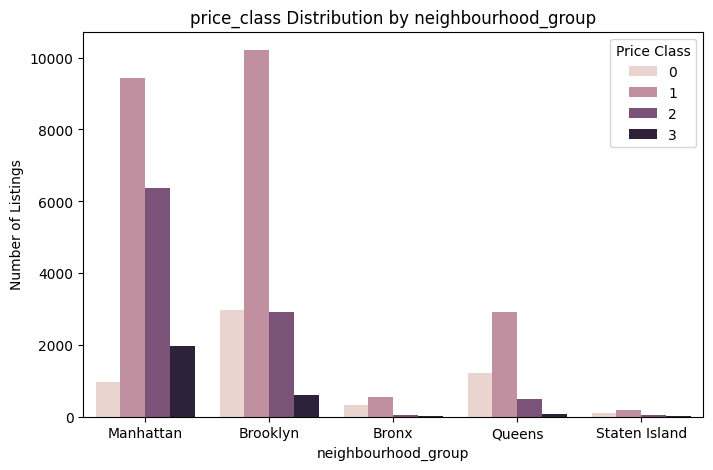

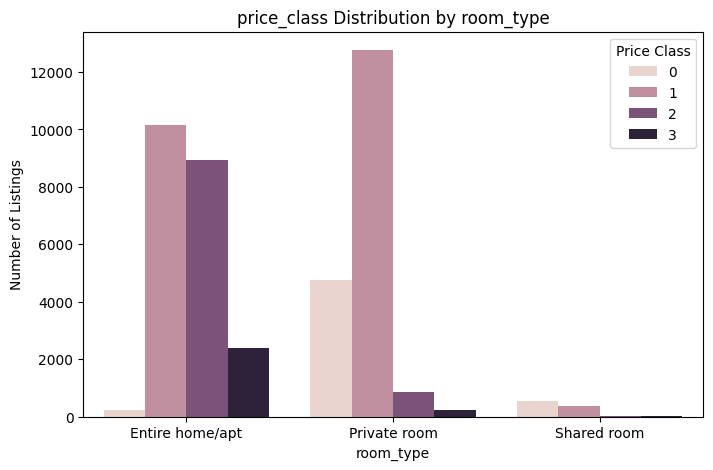

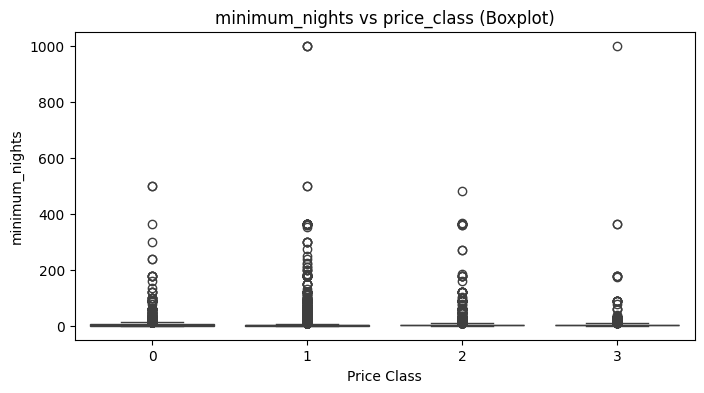

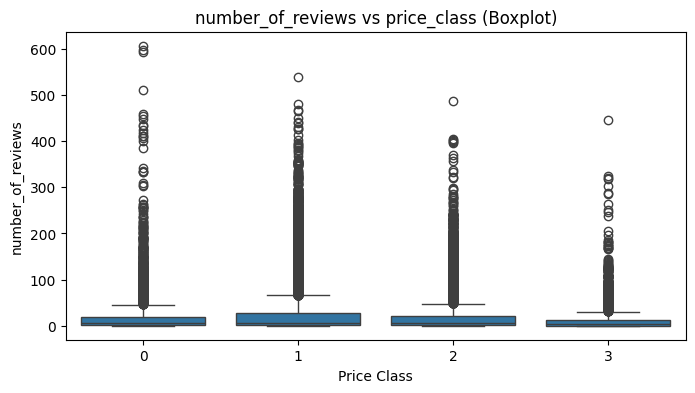

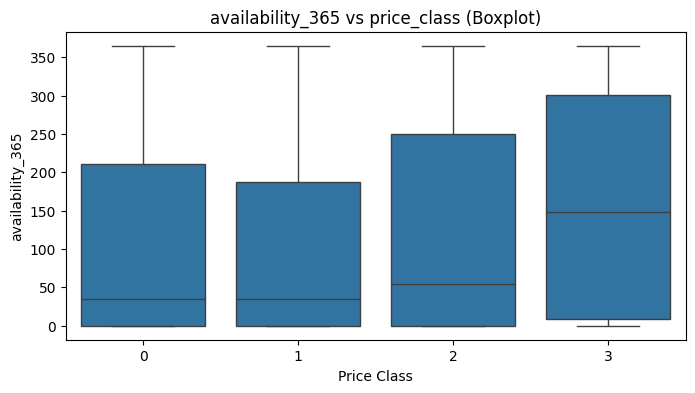

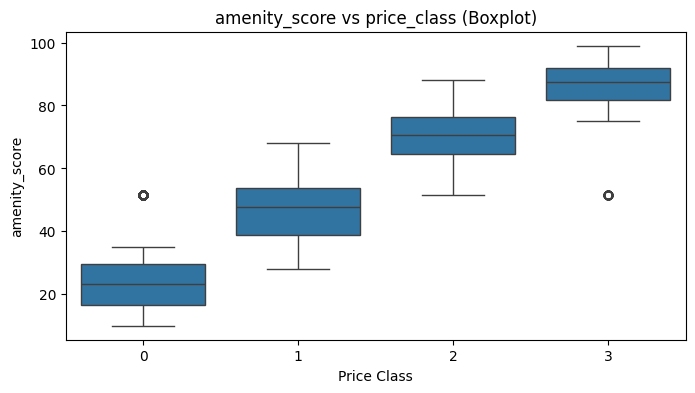

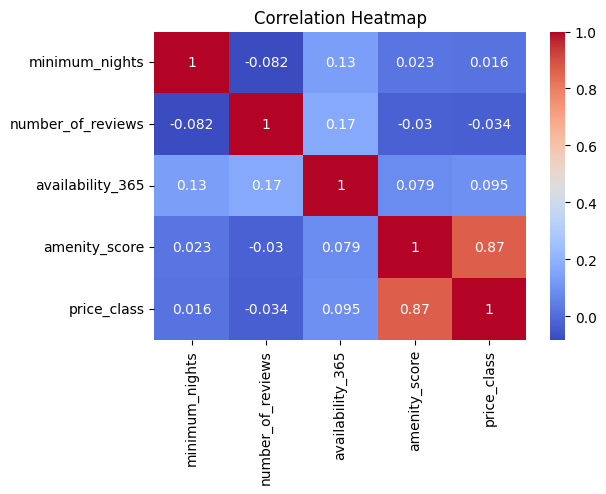


Correlation of numerical features with target:
price_class          1.000000
amenity_score        0.865352
availability_365     0.094887
minimum_nights       0.016005
number_of_reviews   -0.034259
Name: price_class, dtype: float64


In [19]:
# Define features
categorical_features = ['neighbourhood_group', 'room_type']
numerical_features = ['minimum_nights', 'number_of_reviews', 'availability_365', 'amenity_score']
target = 'price_class'

# -----------------------------
# 1️⃣ Categorical Features vs Target
# -----------------------------
for col in categorical_features:
    plt.figure(figsize=(8,5))
    sns.countplot(data=df, x=col, hue=target)
    plt.title(f'{target} Distribution by {col}')
    plt.xlabel(col)
    plt.ylabel('Number of Listings')
    plt.legend(title='Price Class')
    plt.show()

# -----------------------------
# 2️⃣ Numerical Features vs Target
# -----------------------------
for col in numerical_features:
    # Boxplot
    plt.figure(figsize=(8,4))
    sns.boxplot(x=target, y=col, data=df)
    plt.title(f'{col} vs {target} (Boxplot)')
    plt.xlabel('Price Class')
    plt.ylabel(col)
    plt.show()

# -----------------------------
# 3️⃣ Correlation Heatmap (Numerical)
# -----------------------------
plt.figure(figsize=(6,4))
corr_matrix = df[numerical_features + [target]].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Print correlation with target
print("\nCorrelation of numerical features with target:")
print(corr_matrix[target].sort_values(ascending=False))

**Observations**:
1. Manhattan and Brooklyn have the highest number of listings, and within these boroughs, the Moderate price class (1) dominates. The remaining boroughs — Queens, Bronx, and Staten Island — have significantly fewer listings in comparison.

Implications:

The dataset is unevenly distributed across boroughs, and the Moderate class is overrepresented in the most populous boroughs.

* A model trained without accounting for this may overfit to Manhattan and Brooklyn, and may struggle to generalize for boroughs with fewer listings.

* The class imbalance combined with location dominance can bias predictions towards the Moderate class.

Guidelines for Training:

* Stratified sampling during train/test split to ensure all boroughs and price classes are represented proportionally.

* Consider class weights or oversampling/undersampling if needed to handle class imbalance.

* One-hot encode neighbourhood_group, but monitor how the model relies on Manhattan/Brooklyn signals.

* Evaluate model performance per borough in addition to overall metrics to check generalization.

2. There are a few extreme values in minimum_nights, but since we have normalized the feature, it should not cause the model to overfit.

3. amenity_score is a very strong predictor, which is good, but the model might over-rely on it. For neural networks, this is usually okay, but monitor for overfitting and consider dropout or regularization if needed.








END OF PART A

# PART B

In [20]:
#Separate features and target vars
X = df.drop(columns='price_class')  # features
Y = df['price_class']               # target (unchanged)

X = pd.get_dummies(
    X,
    columns=['neighbourhood_group', 'room_type'],  # categorical features
    drop_first=True  # optional: avoids dummy variable trap
)

X_amenity_dropped = X.drop(columns=['amenity_score'], errors='ignore')

df_test = pd.read_csv("test.csv")

X_test = df_test.drop(columns='price_class')  # features
Y_test = df_test['price_class']               # target

# one hot encoding the test data
X_test = pd.get_dummies(
    X_test,
    columns=['neighbourhood_group', 'room_type'],  # categorical
    drop_first=True  # optional: avoids dummy variable trap
)
scaler = MinMaxScaler()
X_test[num_cols] = scaler.fit_transform(X_test[num_cols])
X_test_amenity_dropped = X_test.drop(columns=['amenity_score'], errors='ignore')

## Model 1 Using Sigmoid for activation of hidden layers

In [ ]:
# -----------------------------
# Activation functions
# -----------------------------
def sigmoid(z):
    z = np.clip(np.array(z, dtype=float), -500, 500)  # safe conversion & prevent overflow
    return 1 / (1 + np.exp(-z))

def softmax(z):
    z = np.array(z, dtype=float)
    z_stable = z - np.max(z)
    exp_z = np.exp(z_stable)
    return exp_z / np.sum(exp_z, axis=0, keepdims=True)

# -----------------------------
# Loss function
# -----------------------------
def cross_entropy_loss(y_hat, y):
    y_hat = np.clip(y_hat, 1e-15, 1-1e-15)
    return -np.sum(y * np.log(y_hat))

# -----------------------------
# Neural network parameters
# -----------------------------
np.random.seed(42)

input_size = X.shape[1]       # number of input features 10 includig amenity_score
hidden1_size = 16     # first hidden layer
hidden2_size = 8      # second hidden layer
output_size = 4       # number of classes

# Weight initialization
W1 = np.random.randn(hidden1_size, input_size) * 0.01
b1 = np.zeros((hidden1_size, 1))

W2 = np.random.randn(hidden2_size, hidden1_size) * 0.01
b2 = np.zeros((hidden2_size, 1))

W3 = np.random.randn(output_size, hidden2_size) * 0.01
b3 = np.zeros((output_size, 1))

# Hyperparameters
lr = 0.01
num_epochs = 200

# -----------------------------
# Convert data to safe NumPy arrays
# -----------------------------
X_np = np.array(X, dtype=float).reshape(-1, input_size)  # shape (n_samples, 10)
Y_np = np.array(Y, dtype=int).reshape(-1)               # shape (n_samples,)

# -----------------------------
# Training loop
# -----------------------------
for epoch in range(num_epochs):
    epoch_loss = 0

    for i in range(len(X_np)):
        # --- Forward pass ---
        x = X_np[i].reshape(input_size, 1)  # column vector (10,1)

        z1 = W1 @ x + b1
        a1 = sigmoid(z1)

        z2 = W2 @ a1 + b2
        a2 = sigmoid(z2)

        z3 = W3 @ a2 + b3
        y_hat = softmax(z3)

        # --- One-hot encode target ---
        y = np.zeros((output_size, 1))
        y[int(Y_np[i])] = 1  # integer indexing

        # --- Compute loss ---
        loss = cross_entropy_loss(y_hat, y)
        epoch_loss += loss

        # --- Backward pass ---
        delta3 = y_hat - y
        dW3 = delta3 @ a2.T
        db3 = delta3
        W3 -= lr * dW3
        b3 -= lr * db3

        delta2 = (W3.T @ delta3) * (a2 * (1 - a2))
        dW2 = delta2 @ a1.T
        db2 = delta2
        W2 -= lr * dW2
        b2 -= lr * db2

        delta1 = (W2.T @ delta2) * (a1 * (1 - a1))
        dW1 = delta1 @ x.T
        db1 = delta1
        W1 -= lr * dW1
        b1 -= lr * db1

    # --- Average loss per epoch ---
    avg_loss = epoch_loss / len(X)

    if (epoch+1) % 10 == 0 or epoch == 0:
        print(f"Epoch {epoch+1}/{num_epochs}, Loss: {avg_loss:.4f}")


Epoch 1/200, Loss: 1.1140
Epoch 10/200, Loss: 1.0068


In [ ]:
"""
#Saving the trained parameters
np.savez("model1_sigmoid_weights.npz",
         W1=W1, b1=b1,
         W2=W2, b2=b2,
         W3=W3, b3=b3)"""

### Testing the model1

In [ ]:
X_test.shape

In [ ]:
# Load trained sigmoid model weights
data = np.load("model1_sigmoid_weights.npz")
W1 = data['W1']
b1 = data['b1']
W2 = data['W2']
b2 = data['b2']
W3 = data['W3']
b3 = data['b3']

# -----------------------------
# Convert data to safe NumPy arrays
# -----------------------------
X_test_np = np.array(X_test, dtype=float).reshape(-1, input_size)  # shape (n_samples, 10)
Y_test_np = np.array(Y_test, dtype=int).reshape(-1)               # shape (n_samples,)

test_loss = 0
for i in range(len(X_test_np)):
    x = X_test_np[i].reshape(input_size, 1)

    # Forward pass
    a1 = sigmoid(W1 @ x + b1)
    a2 = sigmoid(W2 @ a1 + b2)
    z3 = W3 @ a2 + b3
    y_hat = softmax(z3)

    # One-hot encode target
    y = np.zeros((4,1))
    y[int(Y_test_np[i])] = 1

    test_loss += cross_entropy_loss(y_hat, y)

avg_test_loss = test_loss / len(X_test_np)
print(f"Test Loss: {avg_test_loss:.4f}")

#### Result Assesment
The Loss is 0.3 whereas the test Loss in around 8 ---> The model is clearly overfitting

Lets remove Amenity and retrain the nn

### Model 1.1: Sigmoid in hidden layers and amenity_score removed

In [ ]:
input_size = X_amenity_dropped.shape[1]


# -----------------------------
# Neural network parameters
# -----------------------------
np.random.seed(42)

input_size = X_amenity_dropped.shape[1]       # number of input features 9 removing amenity_score

# Weight initialization
W1 = np.random.randn(hidden1_size, input_size) * 0.01
b1 = np.zeros((hidden1_size, 1))

W2 = np.random.randn(hidden2_size, hidden1_size) * 0.01
b2 = np.zeros((hidden2_size, 1))

W3 = np.random.randn(output_size, hidden2_size) * 0.01
b3 = np.zeros((output_size, 1))

# -----------------------------
# Convert data to safe NumPy arrays
# -----------------------------
X_np = np.array(X_amenity_dropped, dtype=float).reshape(-1, input_size)  # shape (n_samples, 10)
Y_np = np.array(Y, dtype=int).reshape(-1)               # shape (n_samples,)

# -----------------------------
# Training loop
# -----------------------------
for epoch in range(num_epochs):
    epoch_loss = 0

    for i in range(len(X_np)):
        # --- Forward pass ---
        x = X_np[i].reshape(input_size, 1)  # column vector (9,1)

        z1 = W1 @ x + b1
        a1 = sigmoid(z1)

        z2 = W2 @ a1 + b2
        a2 = sigmoid(z2)

        z3 = W3 @ a2 + b3
        y_hat = softmax(z3)

        # --- One-hot encode target ---
        y = np.zeros((output_size, 1))
        y[int(Y_np[i])] = 1  # integer indexing

        # --- Compute loss ---
        loss = cross_entropy_loss(y_hat, y)
        epoch_loss += loss

        # --- Backward pass ---
        delta3 = y_hat - y
        dW3 = delta3 @ a2.T
        db3 = delta3
        W3 -= lr * dW3
        b3 -= lr * db3

        delta2 = (W3.T @ delta3) * (a2 * (1 - a2))
        dW2 = delta2 @ a1.T
        db2 = delta2
        W2 -= lr * dW2
        b2 -= lr * db2

        delta1 = (W2.T @ delta2) * (a1 * (1 - a1))
        dW1 = delta1 @ x.T
        db1 = delta1
        W1 -= lr * dW1
        b1 -= lr * db1

    # --- Average loss per epoch ---
    avg_loss = epoch_loss / len(X)

    if (epoch+1) % 10 == 0 or epoch == 0:
        print(f"Epoch {epoch+1}/{num_epochs}, Loss: {avg_loss:.4f}")

In [ ]:
"""#Saving the trained parameters
np.savez("model1_var1_sigmoid_weights_amenity_dropped.npz",
         W1=W1, b1=b1,
         W2=W2, b2=b2,
         W3=W3, b3=b3)"""

### Testing Model 1.1

In [ ]:
data = np.load("model1_var1_sigmoid_weights_amenity_dropped.npz")
W1 = data['W1']
b1 = data['b1']
W2 = data['W2']
b2 = data['b2']
W3 = data['W3']
b3 = data['b3']

# Ensure X_test is a NumPy array for the neural network
X_test_np = np.array(X_test_amenity_dropped, dtype=float).reshape(-1, X_test_amenity_dropped.shape[1])
Y_test_np = np.array(Y_test, dtype=int).reshape(-1)               # shape (n_samples,)

test_loss = 0
for i in range(len(X_test_np)):
    x = X_test_np[i].reshape(input_size, 1)

    # Forward pass
    a1 = sigmoid(W1 @ x + b1)
    a2 = sigmoid(W2 @ a1 + b2)
    z3 = W3 @ a2 + b3
    y_hat = softmax(z3)

    # One-hot encode target
    y = np.zeros((4,1))
    y[int(Y_test[i])] = 1

    test_loss += cross_entropy_loss(y_hat, y)

avg_test_loss = test_loss / len(X_test_np)
print(f"Test Loss: {avg_test_loss:.4f}")

## Model 2 Using ReLu for activation of hidden layers

In [ ]:
def relu(z):
    return np.maximum(0, z)

def relu_derivative(z):
    dz = np.array(z, dtype=float)
    dz[dz <= 0] = 0
    dz[dz > 0] = 1
    return dz

# -----------------------------
# Neural network parameters
# -----------------------------
np.random.seed(42)

input_size = 10       # number of input features
hidden1_size = 16     # first hidden layer
hidden2_size = 8      # second hidden layer
output_size = 4       # number of classes

# Weight initialization
W1 = np.random.randn(hidden1_size, input_size) * np.sqrt(2 / input_size)
b1 = np.zeros((hidden1_size, 1))

W2 = np.random.randn(hidden2_size, hidden1_size) * np.sqrt(2 / hidden1_size)
b2 = np.zeros((hidden2_size, 1))

W3 = np.random.randn(output_size, hidden2_size) * np.sqrt(2 / hidden2_size)
b3 = np.zeros((output_size, 1))

# Hyperparameters
lr = 0.001    # I have lowered the learning rate here for Relu
num_epochs = 200

# -----------------------------
# Convert data to safe NumPy arrays
# -----------------------------
X_np = np.array(X, dtype=float).reshape(-1, input_size)  # shape (n_samples, 10)
Y_np = np.array(Y, dtype=int).reshape(-1)               # shape (n_samples,)

# -----------------------------
# Training loop
# -----------------------------
for epoch in range(num_epochs):
    epoch_loss = 0

    for i in range(len(X)):
        # --- Forward pass ---
        x = X_np[i].reshape(input_size, 1)  # column vector (10,1)

        z1 = W1 @ x + b1
        a1 = relu(z1)

        z2 = W2 @ a1 + b2
        a2 = relu(z2)

        z3 = W3 @ a2 + b3
        y_hat = softmax(z3)

        # --- One-hot encode target ---
        y = np.zeros((output_size, 1))
        y[int(Y_np[i])] = 1  # integer indexing

        # --- Compute loss ---
        loss = cross_entropy_loss(y_hat, y)
        epoch_loss += loss

        # --- Backward pass ---
        delta3 = y_hat - y
        dW3 = delta3 @ a2.T
        np.clip(dW3, -1, 1, out=dW3)
        db3 = delta3
        np.clip(db3, -1, 1, out=db3)
        W3 -= lr * dW3
        b3 -= lr * db3

        delta2 = (W3.T @ delta3) * (relu_derivative(z2))
        dW2 = delta2 @ a1.T
        np.clip(dW2, -1, 1, out=dW2)
        db2 = delta2
        np.clip(db2, -1, 1, out=db2)
        W2 -= lr * dW2
        b2 -= lr * db2

        delta1 = (W2.T @ delta2) * (relu_derivative(z1))
        dW1 = delta1 @ x.T
        np.clip(dW1, -1, 1, out=dW1)
        db1 = delta1
        np.clip(db1, -1, 1, out=db1)
        W1 -= lr * dW1
        b1 -= lr * db1

    # --- Average loss per epoch ---
    avg_loss = epoch_loss / len(X_np)

    if (epoch+1) % 10 == 0 or epoch == 0:
        print(f"Epoch {epoch+1}/{num_epochs}, Loss: {avg_loss:.4f}")


**Key Observation:**
The ReLU network shows increasing loss due to unstable gradient updates caused by unnormalized inputs, per-sample SGD, and unbounded ReLU activations, leading to exploding activations and divergence.

In [ ]:
"""#Saving the trained parameters
np.savez("model2_ReLu_weights.npz",
         W1=W1, b1=b1,
         W2=W2, b2=b2,
         W3=W3, b3=b3)"""

### Testing Model 2

In [ ]:
# Load trained sigmoid model weights
data = np.load("model2_ReLu_weights.npz")
W1 = data['W1']
b1 = data['b1']
W2 = data['W2']
b2 = data['b2']
W3 = data['W3']
b3 = data['b3']

X_test_np = np.array(X_test, dtype=float).reshape(-1, input_size)  # shape (n_samples, 10)
Y_test_np = np.array(Y_test, dtype=int).reshape(-1)               # shape (n_samples,)

test_loss = 0
for i in range(len(X_test_np)):
    x = X_test_np[i].reshape(input_size, 1)

    # Forward pass
    a1 = relu(W1 @ x + b1)
    a2 = relu(W2 @ a1 + b2)
    z3 = W3 @ a2 + b3
    y_hat = softmax(z3)

    # One-hot encode target
    y = np.zeros((4,1))
    y[int(Y_test_np[i])] = 1

    test_loss += cross_entropy_loss(y_hat, y)

avg_test_loss = test_loss / len(X_test)
print(f"Test Loss: {avg_test_loss:.4f}")

### Result Assesment:
Similar issue we are seeing in ReLu model as well. the test error >> train error signifying model overfitting.

### Model 2.1: ReLu in hidden layers and amenity_score removed

In [ ]:
# -----------------------------
# Neural network parameters
# -----------------------------
np.random.seed(42)

input_size = X_amenity_dropped.shape[1]    # number of input features

# Weight initialization
W1 = np.random.randn(hidden1_size, input_size) * np.sqrt(2 / input_size)
b1 = np.zeros((hidden1_size, 1))

W2 = np.random.randn(hidden2_size, hidden1_size) * np.sqrt(2 / hidden1_size)
b2 = np.zeros((hidden2_size, 1))

W3 = np.random.randn(output_size, hidden2_size) * np.sqrt(2 / hidden2_size)
b3 = np.zeros((output_size, 1))

# Hyperparameters
lr = 0.001    # I have lowered the learning rate here for Relu
num_epochs = 200

# -----------------------------
# Convert data to safe NumPy arrays
# -----------------------------
X_np = np.array(X_amenity_dropped, dtype=float).reshape(-1, input_size)  # shape (n_samples, 10)
Y_np = np.array(Y, dtype=int).reshape(-1)               # shape (n_samples,)

# -----------------------------
# Training loop
# -----------------------------
for epoch in range(num_epochs):
    epoch_loss = 0

    for i in range(len(X_np)):
        # --- Forward pass ---
        x = X_np[i].reshape(input_size, 1)  # column vector (10,1)

        z1 = W1 @ x + b1
        a1 = relu(z1)

        z2 = W2 @ a1 + b2
        a2 = relu(z2)

        z3 = W3 @ a2 + b3
        y_hat = softmax(z3)

        # --- One-hot encode target ---
        y = np.zeros((output_size, 1))
        y[int(Y_np[i])] = 1  # integer indexing

        # --- Compute loss ---
        loss = cross_entropy_loss(y_hat, y)
        epoch_loss += loss

        # --- Backward pass ---
        delta3 = y_hat - y
        dW3 = delta3 @ a2.T
        np.clip(dW3, -1, 1, out=dW3)
        db3 = delta3
        np.clip(db3, -1, 1, out=db3)
        W3 -= lr * dW3
        b3 -= lr * db3

        delta2 = (W3.T @ delta3) * (relu_derivative(z2))
        dW2 = delta2 @ a1.T
        np.clip(dW2, -1, 1, out=dW2)
        db2 = delta2
        np.clip(db2, -1, 1, out=db2)
        W2 -= lr * dW2
        b2 -= lr * db2

        delta1 = (W2.T @ delta2) * (relu_derivative(z1))
        dW1 = delta1 @ x.T
        np.clip(dW1, -1, 1, out=dW1)
        db1 = delta1
        np.clip(db1, -1, 1, out=db1)
        W1 -= lr * dW1
        b1 -= lr * db1

    # --- Average loss per epoch ---
    avg_loss = epoch_loss / len(X_np)

    if (epoch+1) % 10 == 0 or epoch == 0:
        print(f"Epoch {epoch+1}/{num_epochs}, Loss: {avg_loss:.4f}")

In [ ]:
"""#Saving the trained parameters
np.savez("model2_var1_ReLu_weights_amenity_dropped.npz",
         W1=W1, b1=b1,
         W2=W2, b2=b2,
         W3=W3, b3=b3)"""

### Testing Model 2.1

In [ ]:
# Load trained sigmoid model weights
data = np.load("model2_var1_ReLu_weights_amenity_dropped.npz")
W1 = data['W1']
b1 = data['b1']
W2 = data['W2']
b2 = data['b2']
W3 = data['W3']
b3 = data['b3']

X_test_np = np.array(X_test_amenity_dropped, dtype=float).reshape(-1, X_test_amenity_dropped.shape[1])

test_loss = 0
for i in range(len(X_test_np)):
    x = X_test_np[i].reshape(input_size, 1)

    # Forward pass
    a1 = relu(W1 @ x + b1)
    a2 = relu(W2 @ a1 + b2)
    z3 = W3 @ a2 + b3
    y_hat = softmax(z3)

    # One-hot encode target
    y = np.zeros((4,1))
    y[int(Y_test_np[i])] = 1

    test_loss += cross_entropy_loss(y_hat, y)

avg_test_loss = test_loss / len(X_test_np)
print(f"Test Loss: {avg_test_loss:.4f}")

**Observation:**
Interestingly, removing the amenity_score feature improved the performance of the sigmoid-based model while degrading the ReLU-based model. This can be attributed to sigmoid’s susceptibility to saturation when influenced by dominant, highly correlated features. The removal of amenity_score reduced feature domination, leading to improved gradient flow and generalization. In contrast, ReLU benefits from strong linear signals and suffered a loss of representational power when the feature was removed.

## Plotting training and Validation accuracies as a function of iteration(epoch)

#### Before Mitigation Strategy

In [ ]:
# -----------------------------
# Neural network parameters
# -----------------------------
train_accuracy_history = []
val_accuracy_history = []

grad_W1_history = []
grad_W2_history = []

np.random.seed(42)

input_size = 10  # number of input features 9 after removing amenity_score

# Weight initialization
W1 = np.random.randn(hidden1_size, input_size) * 0.01
b1 = np.zeros((hidden1_size, 1))

W2 = np.random.randn(hidden2_size, hidden1_size) * 0.01
b2 = np.zeros((hidden2_size, 1))

W3 = np.random.randn(output_size, hidden2_size) * 0.01
b3 = np.zeros((output_size, 1))

# -----------------------------
# Convert data to safe NumPy arrays
# -----------------------------
X_np = np.array(X, dtype=float).reshape(-1, input_size)
Y_np = np.array(Y, dtype=int).reshape(-1)

X_test_np = np.array(X_test, dtype=float).reshape(-1, input_size)
Y_test_np = np.array(Y_test, dtype=int).reshape(-1)

# -----------------------------
# Training loop
# -----------------------------
for epoch in range(num_epochs):
    epoch_loss = 0
    correct_train = 0
    grad_W1_epoch = 0
    grad_W2_epoch = 0

    for i in range(len(X)):
        # --- Forward pass ---
        x = X_np[i].reshape(input_size, 1)

        z1 = W1 @ x + b1
        a1 = sigmoid(z1)

        z2 = W2 @ a1 + b2
        a2 = sigmoid(z2)

        z3 = W3 @ a2 + b3
        y_hat = softmax(z3)

        # --- One-hot encode target ---
        y = np.zeros((output_size, 1))
        y[int(Y_np[i])] = 1

        # --- Accuracy ---
        if np.argmax(y_hat) == np.argmax(y):
            correct_train += 1

        # --- Compute loss ---
        loss = cross_entropy_loss(y_hat, y)
        epoch_loss += loss

        # --- Backward pass ---
        delta3 = y_hat - y
        dW3 = delta3 @ a2.T
        db3 = delta3
        W3 -= lr * dW3
        b3 -= lr * db3

        delta2 = (W3.T @ delta3) * (a2 * (1 - a2))
        dW2 = delta2 @ a1.T
        db2 = delta2
        W2 -= lr * dW2
        b2 -= lr * db2

        delta1 = (W2.T @ delta2) * (a1 * (1 - a1))
        dW1 = delta1 @ x.T
        db1 = delta1
        W1 -= lr * dW1
        b1 -= lr * db1

        # --- Gradient magnitudes ---
        grad_W1_epoch += np.mean(np.abs(dW1))
        grad_W2_epoch += np.mean(np.abs(dW2))

    # --- Average loss per epoch ---
    avg_loss = epoch_loss / len(X_np)
    train_accuracy = correct_train / len(X_np)

    train_accuracy_history.append(train_accuracy)
    grad_W1_history.append(grad_W1_epoch / len(X_np))
    grad_W2_history.append(grad_W2_epoch / len(X_np))

    # --- Validation (test) accuracy ---
    correct_val = 0
    for i in range(len(X_test_np)):
        x = X_test_np[i].reshape(input_size, 1)

        a1 = sigmoid(W1 @ x + b1)
        a2 = sigmoid(W2 @ a1 + b2)
        y_hat = softmax(W3 @ a2 + b3)

        y = np.zeros((output_size, 1))
        y[int(Y_test_np[i])] = 1

        if np.argmax(y_hat) == np.argmax(y):
            correct_val += 1

    val_accuracy_history.append(correct_val / len(X_test_np))

    if (epoch+1) % 10 == 0 or epoch == 0:
        print(f"Epoch {epoch+1}/{num_epochs}, Loss: {avg_loss:.4f}, "
              f"Train Acc: {train_accuracy:.4f}, Val Acc: {correct_val / len(X_test):.4f}")


In [ ]:
# -----------------------------
# Plot training vs validation accuracy
# -----------------------------
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs+1), train_accuracy_history, label='Train Accuracy', marker='o')
plt.plot(range(1, num_epochs+1), val_accuracy_history, label='Validation Accuracy', marker='x')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy (Sigmoid)')
plt.legend()
plt.grid(True)

# -----------------------------
# Plot average gradient magnitude for hidden layers
# -----------------------------
plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs+1), grad_W1_history, label='Hidden Layer 1', marker='o')
plt.plot(range(1, num_epochs+1), grad_W2_history, label='Hidden Layer 2', marker='x')
plt.xlabel('Epochs')
plt.ylabel('Avg Gradient Magnitude')
plt.title('Gradient Magnitude Across Layers (Sigmoid)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

#### After Mitigation Strategy

In [ ]:
# -----------------------------
# Neural network parameters
# -----------------------------
train_accuracy_history = []
val_accuracy_history = []

grad_W1_history = []
grad_W2_history = []

np.random.seed(42)

input_size = X_amenity_dropped.shape[1]  # number of input features 9 after removing amenity_score

# Weight initialization
W1 = np.random.randn(hidden1_size, input_size) * 0.01
b1 = np.zeros((hidden1_size, 1))

W2 = np.random.randn(hidden2_size, hidden1_size) * 0.01
b2 = np.zeros((hidden2_size, 1))

W3 = np.random.randn(output_size, hidden2_size) * 0.01
b3 = np.zeros((output_size, 1))

# -----------------------------
# Convert data to safe NumPy arrays
# -----------------------------
X = np.array(X_amenity_dropped, dtype=float).reshape(-1, input_size)
Y = np.array(Y, dtype=int).reshape(-1)

X_test = np.array(X_test_amenity_dropped, dtype=float).reshape(-1, input_size)
Y_test = np.array(Y_test, dtype=int).reshape(-1)

# -----------------------------
# Training loop
# -----------------------------
for epoch in range(num_epochs):
    epoch_loss = 0
    correct_train = 0
    grad_W1_epoch = 0
    grad_W2_epoch = 0

    for i in range(len(X)):
        # --- Forward pass ---
        x = X[i].reshape(input_size, 1)

        z1 = W1 @ x + b1
        a1 = sigmoid(z1)

        z2 = W2 @ a1 + b2
        a2 = sigmoid(z2)

        z3 = W3 @ a2 + b3
        y_hat = softmax(z3)

        # --- One-hot encode target ---
        y = np.zeros((output_size, 1))
        y[int(Y[i])] = 1

        # --- Accuracy ---
        if np.argmax(y_hat) == np.argmax(y):
            correct_train += 1

        # --- Compute loss ---
        loss = cross_entropy_loss(y_hat, y)
        epoch_loss += loss

        # --- Backward pass ---
        delta3 = y_hat - y
        dW3 = delta3 @ a2.T
        db3 = delta3
        W3 -= lr * dW3
        b3 -= lr * db3

        delta2 = (W3.T @ delta3) * (a2 * (1 - a2))
        dW2 = delta2 @ a1.T
        db2 = delta2
        W2 -= lr * dW2
        b2 -= lr * db2

        delta1 = (W2.T @ delta2) * (a1 * (1 - a1))
        dW1 = delta1 @ x.T
        db1 = delta1
        W1 -= lr * dW1
        b1 -= lr * db1

        # --- Gradient magnitudes ---
        grad_W1_epoch += np.mean(np.abs(dW1))
        grad_W2_epoch += np.mean(np.abs(dW2))

    # --- Average loss per epoch ---
    avg_loss = epoch_loss / len(X)
    train_accuracy = correct_train / len(X)

    train_accuracy_history.append(train_accuracy)
    grad_W1_history.append(grad_W1_epoch / len(X))
    grad_W2_history.append(grad_W2_epoch / len(X))

    # --- Validation (test) accuracy ---
    correct_val = 0
    for i in range(len(X_test)):
        x = X_test[i].reshape(input_size, 1)

        a1 = sigmoid(W1 @ x + b1)
        a2 = sigmoid(W2 @ a1 + b2)
        y_hat = softmax(W3 @ a2 + b3)

        y = np.zeros((output_size, 1))
        y[int(Y_test[i])] = 1

        if np.argmax(y_hat) == np.argmax(y):
            correct_val += 1

    val_accuracy_history.append(correct_val / len(X_test))

    if (epoch+1) % 10 == 0 or epoch == 0:
        print(f"Epoch {epoch+1}/{num_epochs}, Loss: {avg_loss:.4f}, "
              f"Train Acc: {train_accuracy:.4f}, Val Acc: {correct_val / len(X_test):.4f}")


In [ ]:
# -----------------------------
# Plot training vs validation accuracy
# -----------------------------
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs+1), train_accuracy_history, label='Train Accuracy', marker='o')
plt.plot(range(1, num_epochs+1), val_accuracy_history, label='Validation Accuracy', marker='x')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy (Sigmoid)')
plt.legend()
plt.grid(True)

# -----------------------------
# Plot average gradient magnitude for hidden layers
# -----------------------------
plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs+1), grad_W1_history, label='Hidden Layer 1', marker='o')
plt.plot(range(1, num_epochs+1), grad_W2_history, label='Hidden Layer 2', marker='x')
plt.xlabel('Epochs')
plt.ylabel('Avg Gradient Magnitude')
plt.title('Gradient Magnitude Across Layers (Sigmoid)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


### RELU

In [ ]:
# =============================
# Neural network parameters
# =============================
np.random.seed(42)

input_size = 10        # after amenity_score removal
hidden1_size = 16
hidden2_size = 8
output_size = 4
lr = 0.0005

# He initialization (ReLU)
W1 = np.random.randn(hidden1_size, input_size) * np.sqrt(2 / input_size)
b1 = np.zeros((hidden1_size, 1))

W2 = np.random.randn(hidden2_size, hidden1_size) * np.sqrt(2 / hidden1_size)
b2 = np.zeros((hidden2_size, 1))

W3 = np.random.randn(output_size, hidden2_size) * np.sqrt(2 / hidden2_size)
b3 = np.zeros((output_size, 1))

lr = 0.001
num_epochs = 200

# =============================
# Data
# =============================
X_np = np.array(X, dtype=float).reshape(-1, input_size)
Y_np = np.array(Y, dtype=int).reshape(-1)

X_test_np = np.array(X_test, dtype=float).reshape(-1, input_size)
Y_test_np = np.array(Y_test, dtype=int).reshape(-1)

# =============================
# Tracking
# =============================
train_accuracy_history = []
test_accuracy_history = []
grad_W1_history = []
grad_W2_history = []


# =============================
# Training loop
# =============================
for epoch in range(num_epochs):
    epoch_loss = 0
    correct_train = 0
    grad_W1_epoch = 0
    grad_W2_epoch = 0

    for i in range(len(X_np)):
        # -------- Forward pass --------
        x = X_np[i].reshape(input_size, 1)

        z1 = W1 @ x + b1
        a1 = relu(z1)

        z2 = W2 @ a1 + b2
        a2 = relu(z2)

        z3 = W3 @ a2 + b3
        y_hat = softmax(z3)

        # -------- Target --------
        y = np.zeros((output_size, 1))
        y[Y_np[i]] = 1

        # -------- Accuracy --------
        if np.argmax(y_hat) == Y_np[i]:
            correct_train += 1

        # -------- Loss --------
        loss = cross_entropy_loss(y_hat, y)
        epoch_loss += loss

        # -------- Backward pass --------
        delta3 = y_hat - y
        dW3 = delta3 @ a2.T
        db3 = delta3

        delta2 = (W3.T @ delta3) * relu_derivative(z2)
        dW2 = delta2 @ a1.T
        db2 = delta2

        delta1 = (W2.T @ delta2) * relu_derivative(z1)
        dW1 = delta1 @ x.T
        db1 = delta1

        # -------- Gradient clipping (USED) --------
        np.clip(dW3, -1, 1, out=dW3)
        np.clip(dW2, -1, 1, out=dW2)
        np.clip(dW1, -1, 1, out=dW1)
        np.clip(db3, -1, 1, out=db3)
        np.clip(db2, -1, 1, out=db2)
        np.clip(db1, -1, 1, out=db1)

        # -------- Update --------
        W3 -= lr * dW3
        b3 -= lr * db3
        W2 -= lr * dW2
        b2 -= lr * db2
        W1 -= lr * dW1
        b1 -= lr * db1

        # -------- Gradient magnitude --------
        grad_W1_epoch += np.mean(np.abs(dW1))
        grad_W2_epoch += np.mean(np.abs(dW2))

    # -------- Epoch metrics --------
    train_acc = correct_train / len(X_np)
    avg_loss = epoch_loss / len(X_np)

    train_accuracy_history.append(train_acc)
    grad_W1_history.append(grad_W1_epoch / len(X_np))
    grad_W2_history.append(grad_W2_epoch / len(X_np))

    # -------- Test accuracy --------
    correct_test = 0
    for i in range(len(X_test_np)):
        x = X_test_np[i].reshape(input_size, 1)
        a1 = relu(W1 @ x + b1)
        a2 = relu(W2 @ a1 + b2)
        y_hat = softmax(W3 @ a2 + b3)

        if np.argmax(y_hat) == Y_test_np[i]:
            correct_test += 1

    test_acc = correct_test / len(X_test_np)
    test_accuracy_history.append(test_acc)

    if epoch == 0 or (epoch + 1) % 10 == 0:
        print(f"Epoch {epoch+1}/{num_epochs} | "
              f"Loss: {avg_loss:.4f} | "
              f"Train Acc: {train_acc:.4f} | "
              f"Test Acc: {test_acc:.4f}")


# =============================
# PLOTS
# =============================
epochs = range(1, num_epochs + 1)

# Accuracy plot
plt.figure(figsize=(8, 5))
plt.plot(epochs, train_accuracy_history, label="Training Accuracy")
plt.plot(epochs, test_accuracy_history, label="Test Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("ReLU Model: Training vs Test Accuracy")
plt.legend()
plt.grid(True)
plt.show()

# Gradient magnitude plot
plt.figure(figsize=(8, 5))
plt.plot(epochs, grad_W1_history, label="W1 Gradient Magnitude")
plt.plot(epochs, grad_W2_history, label="W2 Gradient Magnitude")
plt.xlabel("Epochs")
plt.ylabel("Average |Gradient|")
plt.title("ReLU Model: Gradient Magnitude Across Layers")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# -----------------------------
# Plot training vs validation accuracy
# -----------------------------
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs+1), train_accuracy_history, label='Train Accuracy', marker='o')
plt.plot(range(1, num_epochs+1), val_accuracy_history, label='Validation Accuracy', marker='x')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy (Sigmoid)')
plt.legend()
plt.grid(True)

# -----------------------------
# Plot average gradient magnitude for hidden layers
# -----------------------------
plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs+1), grad_W1_history, label='Hidden Layer 1', marker='o')
plt.plot(range(1, num_epochs+1), grad_W2_history, label='Hidden Layer 2', marker='x')
plt.xlabel('Epochs')
plt.ylabel('Avg Gradient Magnitude')
plt.title('Gradient Magnitude Across Layers (Sigmoid)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Part C

In [ ]:
X.shape

In [ ]:
X_test.shape
X_amenity_dropped.shape

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
class MLP(nn.Module):
    def __init__(self, input_size= 9, hidden1=16, hidden2=8, output_size=4):
        super().__init__()
        self.fc1 = nn.Linear(input_size, hidden1)
        self.fc2 = nn.Linear(hidden1, hidden2)
        self.fc3 = nn.Linear(hidden2, output_size)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [ ]:
X_amenity_dropped = X_amenity_dropped.apply(pd.to_numeric, errors='coerce')
X_test_amenity_dropped = X_test_amenity_dropped.apply(pd.to_numeric, errors='coerce')


X_train_np = X_amenity_dropped.to_numpy(dtype=np.float32)
X_test_np  = X_test_amenity_dropped.to_numpy(dtype=np.float32)

X_train = torch.from_numpy(X_train_np)
y_train = torch.tensor(Y.values, dtype=torch.long)

X_test = torch.from_numpy(X_test_np)
y_test = torch.tensor(Y_test.values, dtype=torch.long)


In [ ]:
model = MLP(input_size=X_train.shape[1])
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

epochs = 50

for epoch in range(epochs):
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()

    if (epoch+1) % 10 == 0:
        acc = (outputs.argmax(dim=1) == y_train).float().mean()
        print(f"Epoch {epoch+1}, Loss: {loss.item():.4f}, Acc: {acc:.4f}")


In [ ]:
model.eval()

X_attr = X_test.clone()
X_attr.requires_grad = True

outputs = model(X_attr)
loss = criterion(outputs, y_test)
loss.backward()

# Gradient magnitude per feature
feature_grads = X_attr.grad.abs().mean(dim=0).detach().numpy()


In [ ]:
# Make sure your input tensor requires gradients
X_attr = X_test.clone().detach()
X_attr.requires_grad = True

# Forward pass
outputs = model(X_attr)
loss = criterion(outputs, y_test)  # CrossEntropyLoss
loss.backward()

# Gradient magnitude per feature
feature_importance = X_attr.grad.abs().mean(dim=0).detach().numpy()


In [ ]:
feature_names = X_test_amenity_dropped.columns  # get the column names
importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": feature_importance
}).sort_values(by="Importance", ascending=False)

print(importance_df)

In [ ]:
plt.figure(figsize=(8,5))
plt.barh(
    importance_df["Feature"],
    importance_df["Importance"]
)
plt.gca().invert_yaxis()
plt.title("Gradient-Based Feature Importance (ReLU)")
plt.xlabel("Average |∂L/∂x|")
plt.tight_layout()
plt.show()
